# Plot EEG by Version

The notebook allows you to plot the EEG data for all three versions of the experiment so that they can be compared visually.

In [4]:
# this cell loads the things we will need (make sure to run this!)
from muselsl import stream, list_muses, view, record
from mne import Epochs, find_events
from time import time, strftime, gmtime
import os
from utils import utils
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

In [5]:
%%capture
# read in the data

subject = 2

all_epochs = []
for v in range(3):
    raw = utils.load_data('visual/nb2020', sfreq=256., 
                      subject_nb=subject, session_nb=v+1)
    
    raw.filter(1,30, method='iir')
    events = find_events(raw)
    event_id = {'Face': 1, 'Baby': 2, 'House': 3, 'Castle': 4}

    # Create an MNE Epoch
    epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 
                verbose=False, picks=[0,1,2,3])
    all_epochs.append(epochs)
    


### Frequent vs. Infrequent

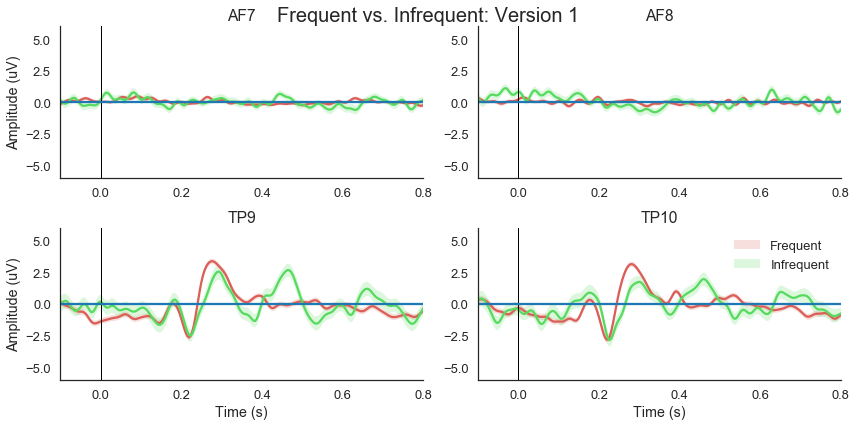

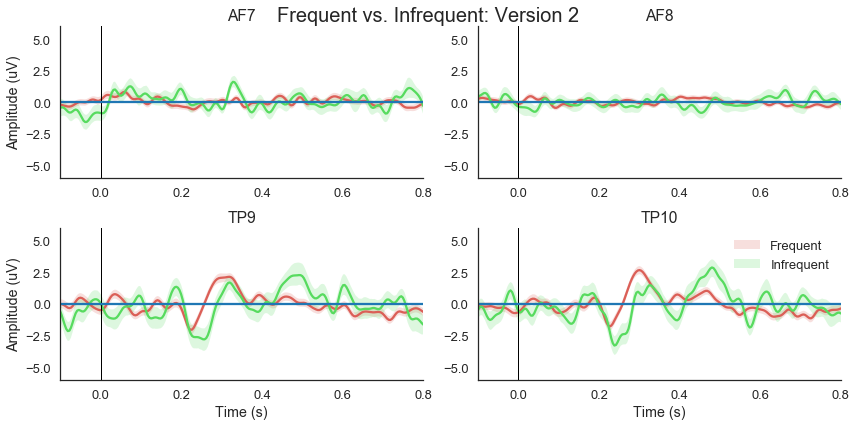

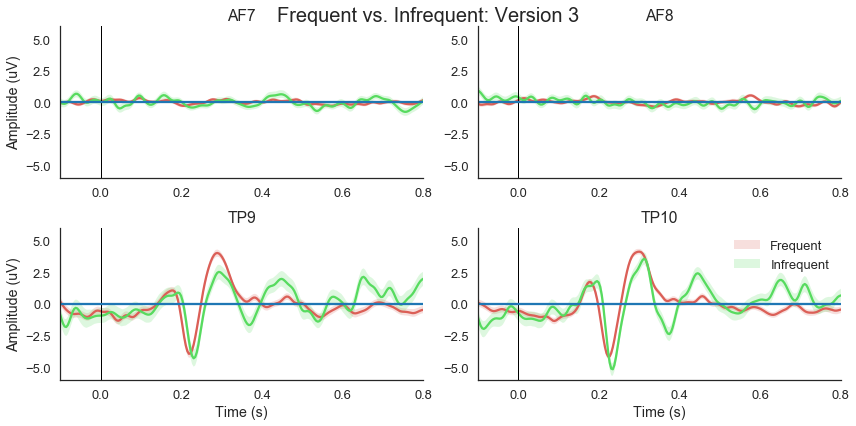

In [6]:
%matplotlib inline
conditions = OrderedDict()
conditions['Frequent'] = [1, 3]
conditions['Infrequent'] = [2, 4]

for v in range(3):
    fig, ax = utils.plot_conditions(all_epochs[v], conditions=conditions, 
                                ci=68, n_boot=1000, title='Frequent vs. Infrequent: Version {}'.format(v+1))

### Face vs. Building

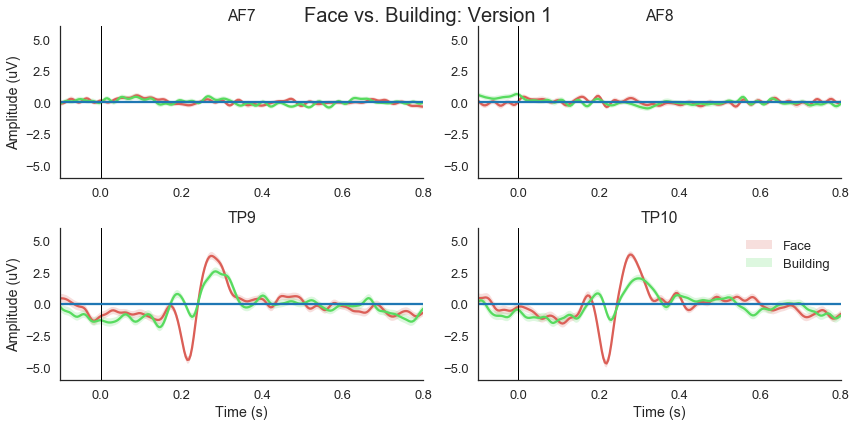

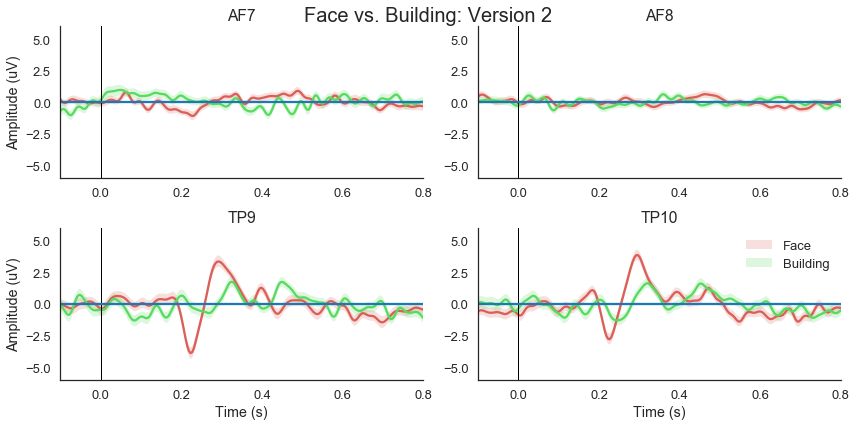

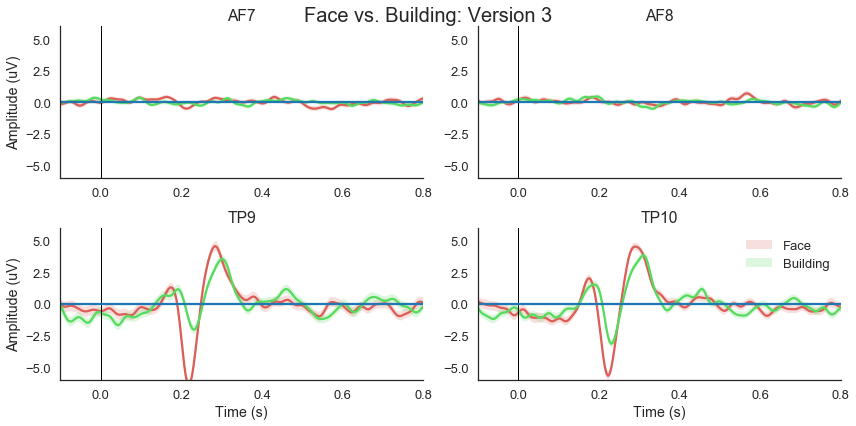

In [7]:
%matplotlib inline
conditions = OrderedDict()
conditions['Face'] = [1, 2]
conditions['Building'] = [3, 4]

for v in range(3):
    fig, ax = utils.plot_conditions(all_epochs[v], conditions=conditions, 
                                ci=68, n_boot=1000, title='Face vs. Building: Version {}'.format(v+1))

### Faces: Adult vs. Baby

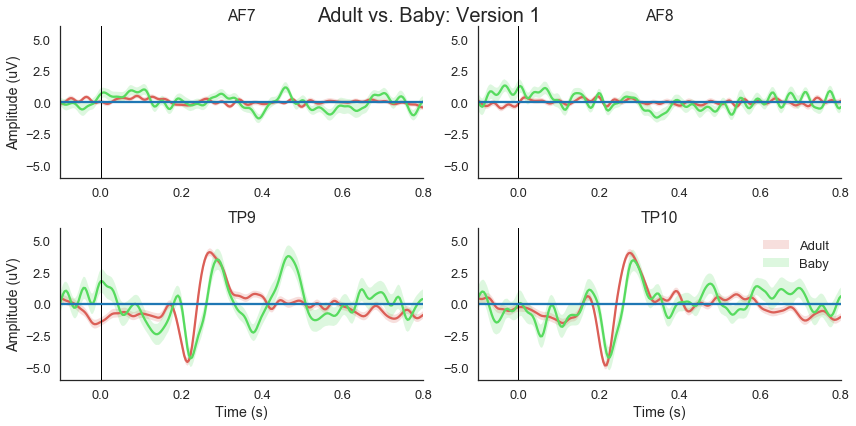

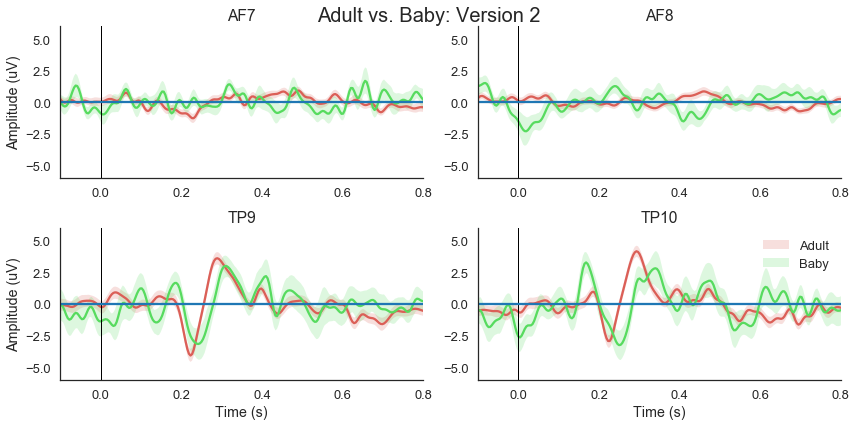

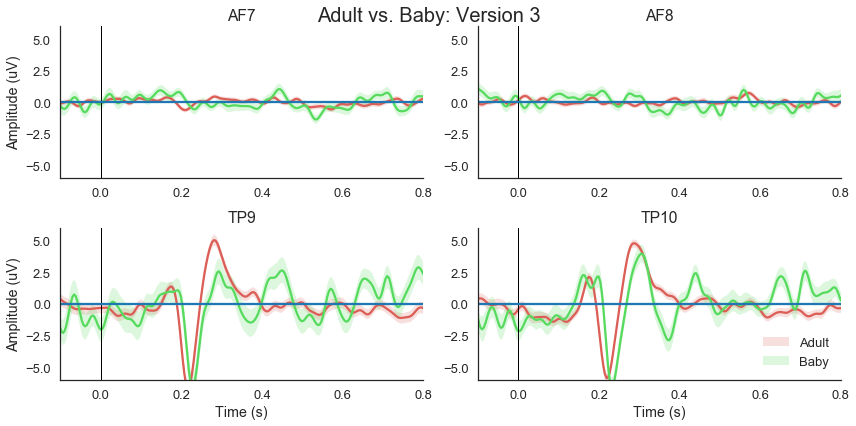

In [8]:
%matplotlib inline
conditions = OrderedDict()
conditions['Adult'] = [1]
conditions['Baby'] = [2]

for v in range(3):
    fig, ax = utils.plot_conditions(all_epochs[v], conditions=conditions, 
                                ci=68, n_boot=1000, title='Adult vs. Baby: Version {}'.format(v+1))

### Buildings: House vs. Castle

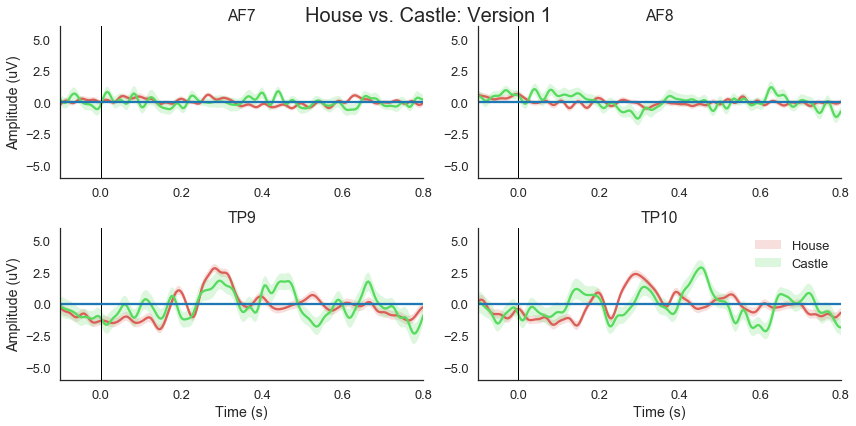

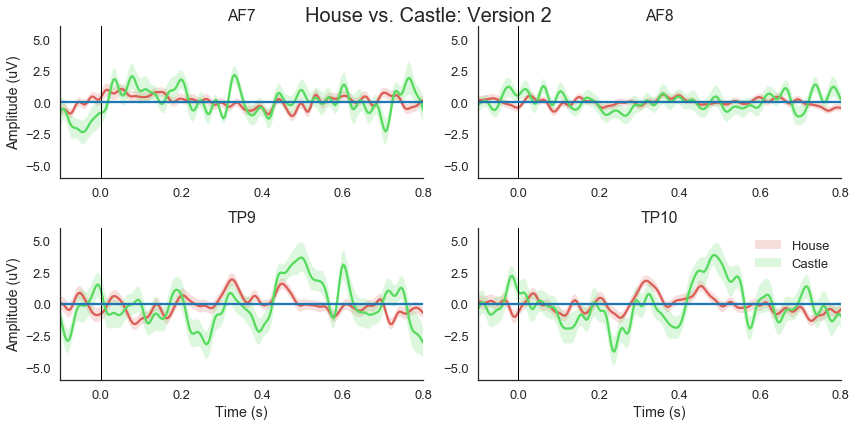

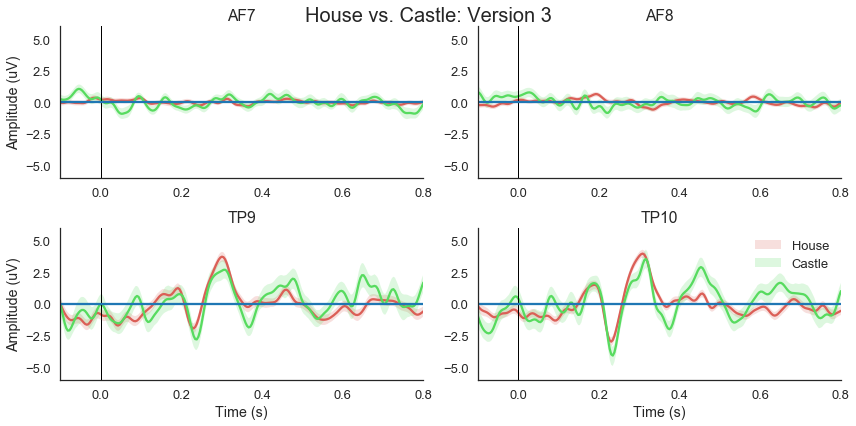

In [9]:
%matplotlib inline
conditions = OrderedDict()
conditions['House'] = [3]
conditions['Castle'] = [4]

for v in range(3):
    fig, ax = utils.plot_conditions(all_epochs[v], conditions=conditions, 
                                ci=68, n_boot=1000, title='House vs. Castle: Version {}'.format(v+1))